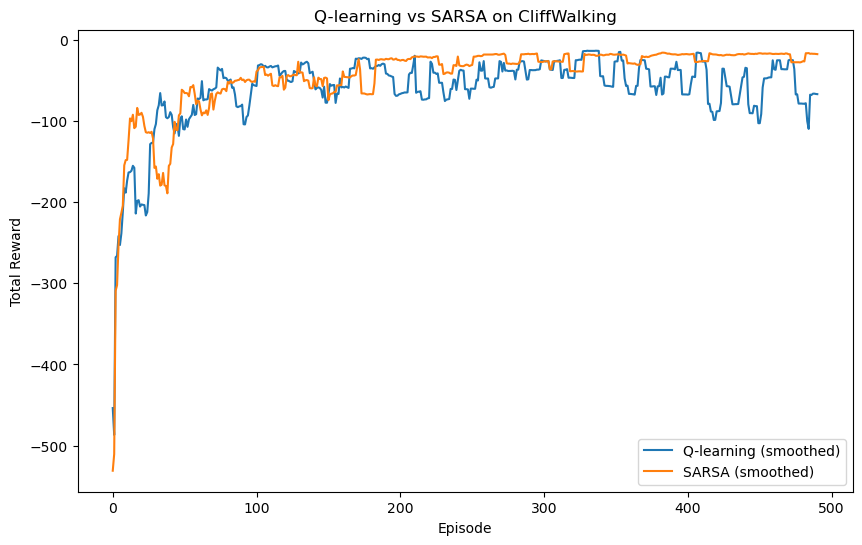

In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_action(state, Q, epsilon):
    """
    Epsilon-greedy strategy for choosing an action given a state and Q-table.
    """
    if np.random.rand() < epsilon:
        return np.random.randint(Q.shape[1])  # Random action
    else:
        return np.argmax(Q[state, :])  # Best action

def q_learning(env, alpha=0.1, gamma=1.0, epsilon=0.1, episodes=500):
    """
    Q-learning algorithm for CliffWalking-v0.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))
    returns_list = []

    for ep in range(episodes):
        reset_output = env.reset()
        state = reset_output[0] if isinstance(reset_output, tuple) else reset_output  # 兼容 Gym/Gymnasium
        done = False
        total_reward = 0
        
        while not done:
            action = epsilon_greedy_action(state, Q, epsilon)
            next_output = env.step(action)
            next_state, reward, done = next_output[:3]  # 兼容 Gym/Gymnasium

            next_state = max(0, min(next_state, Q.shape[0] - 1))  # 防止索引越界
            
            # Q-learning update
            best_next_action = np.argmax(Q[next_state, :])
            td_target = reward + gamma * Q[next_state, best_next_action] * (not done)
            Q[state, action] += alpha * (td_target - Q[state, action])
            
            state = next_state
            total_reward += reward
        
        returns_list.append(total_reward)
    
    return Q, returns_list

def sarsa(env, alpha=0.1, gamma=1.0, epsilon=0.1, episodes=500):
    """
    SARSA algorithm for CliffWalking-v0.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q = np.zeros((n_states, n_actions))
    returns_list = []

    for ep in range(episodes):
        reset_output = env.reset()
        state = reset_output[0] if isinstance(reset_output, tuple) else reset_output  # 兼容 Gym/Gymnasium
        action = epsilon_greedy_action(state, Q, epsilon)
        done = False
        total_reward = 0
        
        while not done:
            next_output = env.step(action)
            next_state, reward, done = next_output[:3]  # 兼容 Gym/Gymnasium

            next_state = max(0, min(next_state, Q.shape[0] - 1))  # 防止索引越界
            next_action = epsilon_greedy_action(next_state, Q, epsilon)
            
            # SARSA update
            td_target = reward + gamma * Q[next_state, next_action] * (not done)
            Q[state, action] += alpha * (td_target - Q[state, action])
            
            state, action = next_state, next_action
            total_reward += reward
        
        returns_list.append(total_reward)
    
    return Q, returns_list

if __name__ == "__main__":
    # Create the CliffWalking environment
    env = gym.make("CliffWalking-v0")

    # Hyperparameters
    alpha = 0.1
    gamma = 1.0
    epsilon = 0.1
    episodes = 500

    # Run Q-learning
    Q_qlearning, returns_qlearning = q_learning(env, alpha, gamma, epsilon, episodes)

    # Run SARSA
    Q_sarsa, returns_sarsa = sarsa(env, alpha, gamma, epsilon, episodes)

    # Smoothing function (avoid errors for short data)
    def smooth(data, window=10):
        if len(data) < window:
            return data
        return np.convolve(data, np.ones(window)/window, mode='valid')

    # Plot the results
    plt.figure(figsize=(10,6))
    plt.plot(smooth(returns_qlearning), label="Q-learning (smoothed)")
    plt.plot(smooth(returns_sarsa), label="SARSA (smoothed)")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Q-learning vs SARSA on CliffWalking")
    plt.legend()
    plt.show()

    env.close()

